In [1]:
import torch
from imageio import imsave
from imageio.v3 import imread
from torch.autograd import Variable

from models.edgeExtractionModule import CandyNet

In [288]:
img = imread('../data/img_1.png')/255

In [289]:
img.shape

(346, 1190, 4)

In [290]:
img = torch.from_numpy(img.transpose((2, 0, 1)))
batch = torch.stack([img]).float()

In [291]:
net = CandyNet(threshold=3.0, use_cuda=False)
# net.eval()

In [292]:
data = Variable(batch)

In [293]:

blurred_img, grad_mag, grad_orientation, thin_edges, thresholded, early_threshold = net(data)

In [294]:
imsave('../data/result/gradient_magnitude.png', grad_mag.data.cpu().numpy()[0, 0])
imsave('../data/result/thin_edges.png', thresholded.data.cpu().numpy()[0, 0])
imsave('../data/result/final.png', (thresholded.data.cpu().numpy()[0, 0] > 0.0).astype(float))
imsave('../data/result/thresholded.png', early_threshold.data.cpu().numpy()[0, 0])

Lossy conversion from float32 to uint8. Range [0.0, 65.85297393798828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 65.85297393798828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 65.85297393798828]. Convert image to uint8 prior to saving to suppress this warning.


In [61]:
img_r = data[:, 0:1]
img_g = data[:, 1:2]
img_b = data[:, 2:3]
data.shape

torch.Size([1, 3, 969, 969])

In [62]:
img_r.shape, img_g.shape, img_b.shape,


(torch.Size([1, 1, 969, 969]),
 torch.Size([1, 1, 969, 969]),
 torch.Size([1, 1, 969, 969]))

In [41]:
img.shape

torch.Size([4, 109, 215])

In [63]:
test = torch.ones(2, 3, 40, 40)

In [64]:
data = Variable(test)

In [66]:
net(data)

RuntimeError: The size of tensor a (3200) must match the size of tensor b (1600) at non-singleton dimension 1

In [71]:
#test = torch.ones(2,3,40,40)
test = torch.ones(40, 40)

In [72]:
s = torch.squeeze(test)

In [73]:
s.shape

torch.Size([40, 40])

In [84]:
s = torch.tensor([1, 2, 3, 4, 5, 6])

In [85]:
s = s.reshape(2, 3)

In [86]:
s.shape

torch.Size([2, 3])

In [87]:
s = torch.squeeze(s)

In [88]:
s

tensor([[1, 2, 3],
        [4, 5, 6]])

In [160]:
s = torch.rand(1, 1, 960, 960)

In [161]:
s.shape

torch.Size([1, 1, 960, 960])

In [162]:
inidices_positive = s
pixel_count = 921600

In [163]:
a = inidices_positive.view(-1).data * pixel_count

In [135]:
a.shape

torch.Size([1843200])

In [164]:
pixel_range = torch.FloatTensor([range(pixel_count)])

In [153]:
a = inidices_positive.view(inidices_positive.shape[0], pixel_count).data * pixel_count + pixel_range

In [154]:
a.shape

torch.Size([2, 921600])

In [155]:
a.squeeze()

tensor([[ 779418.6875,  461111.6250,  791611.6875,  ..., 1575586.7500,
         1240965.3750, 1474058.5000],
        [ 822426.5000,  581591.9375,  188466.7500,  ..., 1035389.3125,
         1045094.1875, 1138054.3750]])

In [156]:
a.shape

torch.Size([2, 921600])

In [128]:
a = inidices_positive[]

In [130]:
a.shape[0]

2

In [140]:
all_filtered = torch.rand(1, 8, 960, 960)

In [141]:
a = all_filtered.view(-1)
a.shape

torch.Size([7372800])

In [146]:
indices = torch.tensor(921600)
a = all_filtered.view(-1)[indices.long()]
a

tensor(0.5786)

In [149]:
indices = torch.rand(921600)
a = all_filtered.view(-1)[indices.long()].view(1, 960, 960)
a.shape

torch.Size([1, 960, 960])

In [151]:
indices = torch.rand(921600)
a = all_filtered.view(
    all_filtered.shape[0], all_filtered.shape[1] * all_filtered.shape[2] * all_filtered.shape[3]
)[:, indices.long()].view(all_filtered.shape[0], 1, 960, 960)
a.shape

torch.Size([1, 1, 960, 960])

In [165]:
a = (inidices_positive.view(
    inidices_positive.shape[0],
    pixel_count
).data * pixel_count + pixel_range).squeeze()
a.shape

torch.Size([921600])

In [158]:
pixel_range.shape

torch.Size([1, 921600])

In [159]:
a.squeeze().shape

torch.Size([2, 921600])

In [167]:
a = torch.rand(1, 960, 960)
b = torch.rand(1, 960, 960)

In [169]:
c = torch.stack((a, b))
c.shape

torch.Size([2, 1, 960, 960])

In [170]:
a = torch.rand(3,2,1, 960, 960)

In [173]:
min =a.min(dim=1)

In [174]:
min.dtype

AttributeError: 'torch.return_types.min' object has no attribute 'dtype'

In [175]:
min

torch.return_types.min(
values=tensor([[[[0.1502, 0.1116, 0.5261,  ..., 0.3723, 0.1460, 0.4261],
          [0.0322, 0.2744, 0.4678,  ..., 0.1990, 0.3969, 0.1669],
          [0.5404, 0.1371, 0.2179,  ..., 0.1070, 0.2627, 0.3189],
          ...,
          [0.0944, 0.4495, 0.5798,  ..., 0.0507, 0.2139, 0.2381],
          [0.4914, 0.3715, 0.1627,  ..., 0.5249, 0.7804, 0.1886],
          [0.4974, 0.1663, 0.3658,  ..., 0.3603, 0.2608, 0.7597]]],


        [[[0.1436, 0.7733, 0.0158,  ..., 0.6570, 0.3582, 0.3900],
          [0.6516, 0.2905, 0.3923,  ..., 0.4577, 0.2024, 0.2735],
          [0.8882, 0.2048, 0.3453,  ..., 0.6230, 0.0853, 0.0482],
          ...,
          [0.0974, 0.0433, 0.6571,  ..., 0.2046, 0.0811, 0.7758],
          [0.0250, 0.8369, 0.5655,  ..., 0.4034, 0.0605, 0.7486],
          [0.6414, 0.0318, 0.1345,  ..., 0.4712, 0.0445, 0.1766]]],


        [[[0.0399, 0.4376, 0.1432,  ..., 0.3485, 0.1611, 0.3497],
          [0.8597, 0.3750, 0.0173,  ..., 0.2160, 0.7134, 0.1400],
       

In [178]:
min.values.shape

torch.Size([3, 1, 960, 960])

In [202]:
a = min[:][0]>0

In [203]:
a.shape

torch.Size([3, 1, 960, 960])

In [241]:
img

tensor([[[0.0392, 0.0353, 0.0275,  ..., 0.0275, 0.0314, 0.0314],
         [0.0353, 0.0314, 0.0275,  ..., 0.0235, 0.0275, 0.0275],
         [0.0275, 0.0275, 0.0275,  ..., 0.0235, 0.0235, 0.0235],
         ...,
         [0.0431, 0.0431, 0.0431,  ..., 0.0353, 0.0353, 0.0431],
         [0.0431, 0.0431, 0.0431,  ..., 0.0392, 0.0431, 0.0471],
         [0.0431, 0.0392, 0.0392,  ..., 0.0431, 0.0471, 0.0471]],

        [[0.0353, 0.0314, 0.0235,  ..., 0.0275, 0.0314, 0.0314],
         [0.0314, 0.0275, 0.0235,  ..., 0.0235, 0.0275, 0.0275],
         [0.0235, 0.0235, 0.0235,  ..., 0.0235, 0.0235, 0.0235],
         ...,
         [0.0235, 0.0235, 0.0235,  ..., 0.0078, 0.0078, 0.0157],
         [0.0235, 0.0235, 0.0235,  ..., 0.0118, 0.0157, 0.0196],
         [0.0235, 0.0196, 0.0196,  ..., 0.0157, 0.0196, 0.0196]],

        [[0.0588, 0.0549, 0.0471,  ..., 0.0275, 0.0314, 0.0314],
         [0.0549, 0.0510, 0.0471,  ..., 0.0235, 0.0275, 0.0275],
         [0.0471, 0.0471, 0.0471,  ..., 0.0235, 0.0235, 0.

In [244]:
img.shape

torch.Size([4, 3072, 4096])

In [245]:
torch.ones()

TypeError: ones() received an invalid combination of arguments - got (), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [253]:
img.shape

torch.Size([3, 414, 999])

In [277]:
img = imread('../data/IMG_1177.jpg')/24
img = torch.from_numpy(img.transpose((2, 0, 1)))
img = img[0]

In [278]:
img.shape

torch.Size([414, 999])

In [279]:
b = torch.ones(414,999)

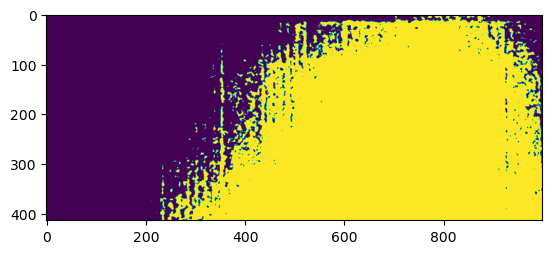

In [280]:
import matplotlib.pyplot as plt
plt.imshow(img>img.mean())

In [297]:
img = imread('../data/result/final.png')
img.shape

(346, 1190)

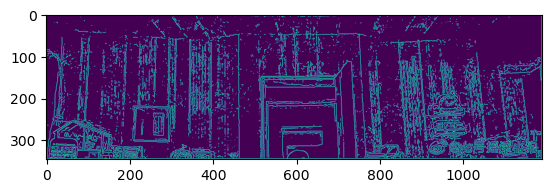

In [298]:
plt.imshow(img)

In [299]:
img.min()

0

In [300]:
img.max()

255

In [301]:
c = 255-img

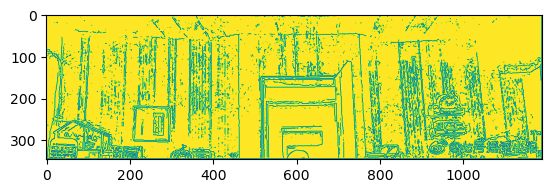

In [302]:
plt.imshow(c)

In [303]:
imsave('../data/result/final.png', c)

In [16]:
x = torch.ones(2,1,2,3)

In [17]:
x

tensor([[[[1., 1., 1.],
          [1., 1., 1.]]],


        [[[1., 1., 1.],
          [1., 1., 1.]]]])

In [7]:
a = torch.stack([x,x,x],dim=0)

In [8]:
a.shape

torch.Size([3, 1, 1, 2, 3])

In [9]:
x.shape

torch.Size([1, 1, 2, 3])

In [18]:
y = torch.zeros(2,3,2,3)

In [19]:
c = y+x

In [21]:
c

tensor([[[[1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.]]],


        [[[1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.]]]])

In [1]:
import  torch.nn as nn

In [2]:
nn.ModuleList()

ModuleList()

In [3]:
list(nn.ModuleList())

[]

In [5]:
import torch
log = torch.Tensor()

In [7]:
 log = torch.cat(
            (log, torch.zeros(1, 5))
        )
log[-1,0] = 24.5
log[-1,1] = 35.4

In [8]:
log.shape

torch.Size([1, 5])